**Experiment 6:** Implement Holt Winters method in Python.

<ipython-input-1-e33c991dc02b>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('dailysales.csv',parse_dates=['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    704 non-null    datetime64[ns]
 1   sales   704 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.1 KB


<Axes: xlabel='date', ylabel='Resid'>

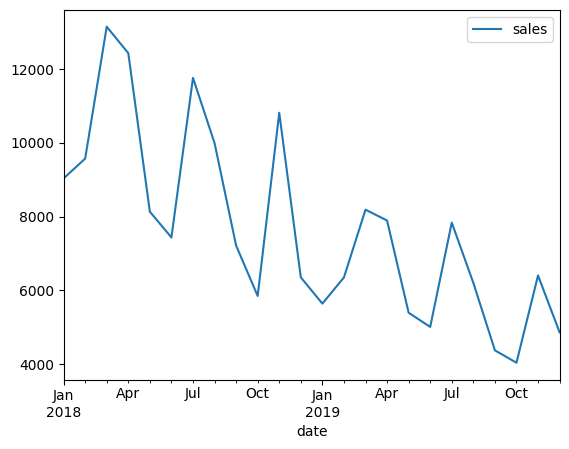

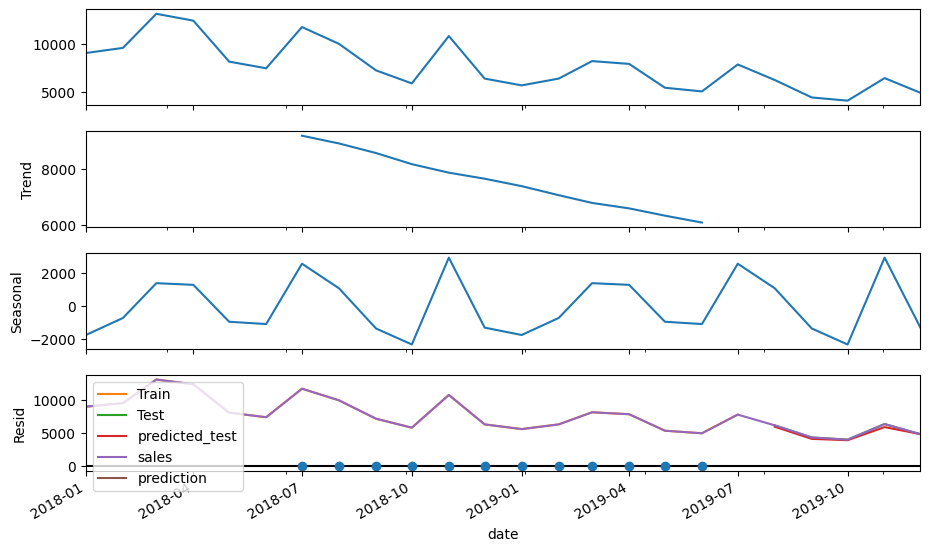

In [ ]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

df=pd.read_csv('dailysales.csv',parse_dates=['date'])
df.info()
df.head()
df.isnull().sum()

df=df.groupby('date').sum()
df.head(10)
df=df.resample(rule='MS').sum()
df.head(10)
df.plot()

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df,model='additive').plot();
train=df[:19] #till Jul19
test=df[19:] # from aug19
train.tail()
test

from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwmodel=ExponentialSmoothing(train.sales,trend='add', seasonal='mul', seasonal_periods=4).fit()

test_pred=hwmodel.forecast(5)
test_pred
train['sales'].plot(legend=True, label='Train', figsize=(10,6))
test['sales'].plot(legend=True, label='Test')
test_pred.plot(legend=True, label='predicted_test')

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test,test_pred))
df.sales.mean(), np.sqrt(df.sales.var())

final_model=ExponentialSmoothing(df.sales,trend='add', seasonal='mul', seasonal_periods=4).fit()

pred=final_model.forecast(10)
pred
df['sales'].plot(legend=True, label='sales', figsize=(10,6))
pred.plot(legend=True, label='prediction')
